## Lab 3 Report

Simon Chen & Shih-Ming Lin

In [27]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import simpleaudio as sa

## Summary

In this lab, we do the convolution by using python to find out the response of LTI systems with different impulse responses to different signals. Also, we use the convolution to solve a simple speech realignment task, which is to recover the original audio file from three signals.

## Assignment 1: Convolving Signals

<IPython.core.display.Javascript object>


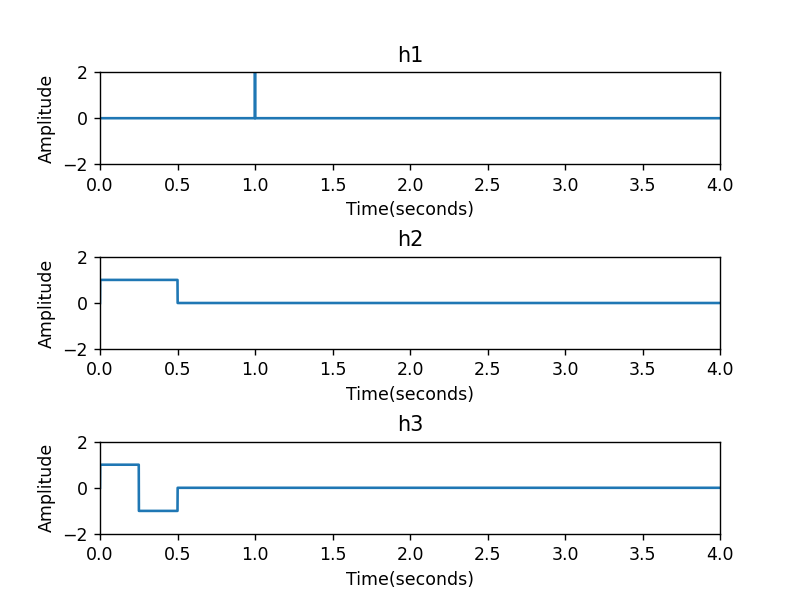

<IPython.core.display.Javascript object>


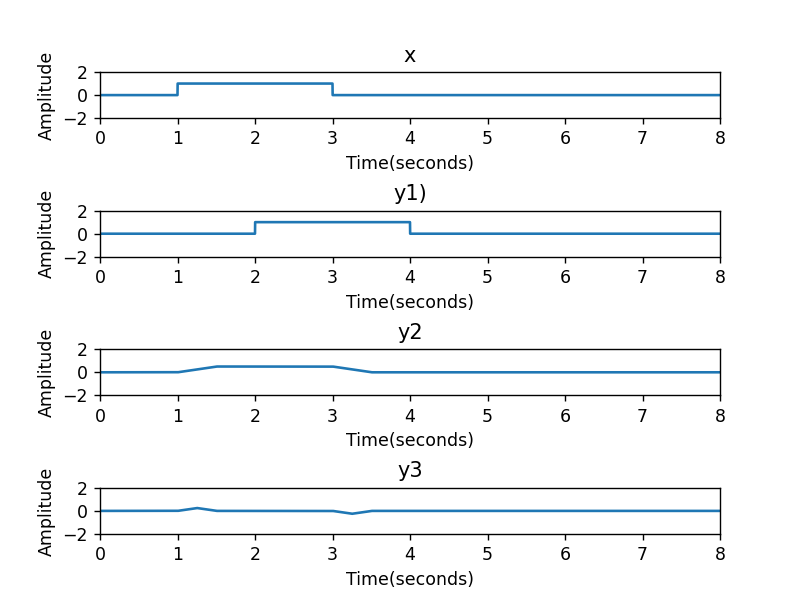

(-2.0, 2.0)

In [31]:
# Assignment 1: Convolving Signals

# Part A
fs = 1000
t = np.arange(0, 4*fs+1,1)*1/fs

def u(t):
    return 1.0*(t>0)

x = u(t-1)- u(t-3)

impulse_n = int(1*fs)
h1 = np.zeros(len(t))
h1[impulse_n] = fs

h2 = u(t) - u(t-0.5)

h3 = u(t) - 2 * u(t - 0.25) + u(t - 0.5)

# Part B
th = np.arange(0, 4*fs+1,1)*1/fs

fig1 = plt.figure(1)
fig1.subplots_adjust(hspace = 1, wspace = 0.5)

plt.subplot(3,1,1)
plt.plot(th, h1)
plt.title('h1')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,4)
plt.ylim(-2,2)

plt.subplot(3,1,2)
plt.plot(th, h2)
plt.title('h2')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,4)
plt.ylim(-2,2)

plt.subplot(3,1,3)
plt.plot(th, h3)
plt.title('h3')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,4)
plt.ylim(-2,2)

# Part C
y1 = np.convolve(x,h1)/fs
y2 = np.convolve(x,h2)/fs
y3 = np.convolve(x,h3)/fs

# Part D
ty = np.arange(0,8*fs+1,1)*1/fs
x1 = np.concatenate([x,np.zeros(4*fs)])

fig2 = plt.figure(2)
fig2.subplots_adjust(hspace = 2, wspace = 0.5)

plt.subplot(4,1,1)
plt.plot(ty, x1)
plt.title('x')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,8)
plt.ylim(-2,2)

plt.subplot(4,1,2)
plt.plot(ty, y1)
plt.title('y1)')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,8)
plt.ylim(-2,2)

plt.subplot(4,1,3)
plt.plot(ty, y2)
plt.title('y2')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,8)
plt.ylim(-2,2)

plt.subplot(4,1,4)
plt.plot(ty, y3)
plt.title('y3')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,8)
plt.ylim(-2,2)

###  Discussion
If we uesd fs=10, instead of fs = 1000, the sampling rate would be lower.The shape of h1, h2, h3 will be like trapezoids since it would catch the signal less accurately due to lower sampling rate. The maximum amplitude of x and the time interval that the maximum amplitude occurs correspond to the largest values of y2(t) and y3(t).



## Assignment 2: Revisiting Time Delay Transformation

<IPython.core.display.Javascript object>


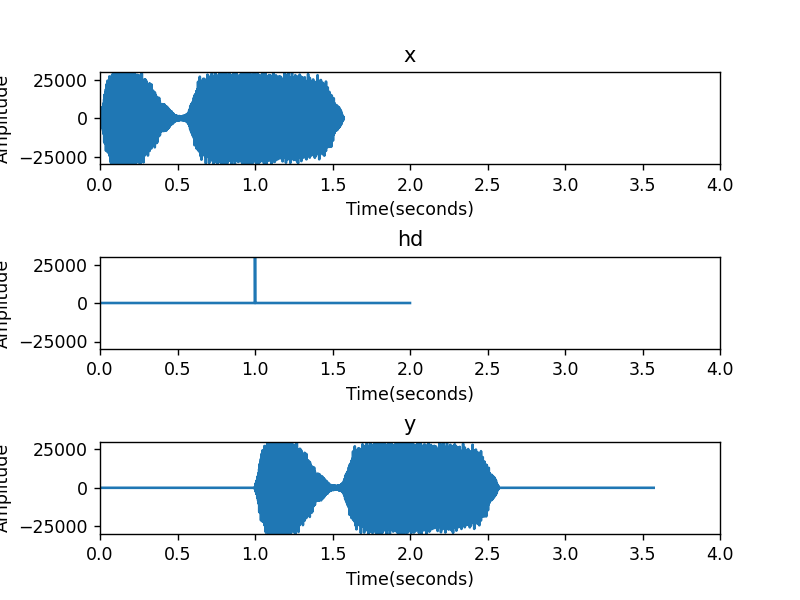

(-30000.0, 30000.0)

In [32]:
# Assignment 2: Revisiting Time Delay Transformation

# Part A
fs, x = wav.read('train32.wav')
lenx = x.shape
lenx1 = lenx[0]
x1 = lenx1 * 1/fs
t_x = np.arange(0,x1*fs,1)*1/fs

# Part B
t_h = np.arange(0, 2*fs,1)*1/fs
impulse_n = int(1*fs)
hd = np.zeros(len(t_h))
hd[impulse_n] = fs

# Part C
y = np.convolve(x,hd)/fs
y1 = len(y)
t_y = np.arange(0,y1,1)*1/fs

# Part D
fig3 = plt.figure(3)
fig3.subplots_adjust(hspace = 1, wspace = 0.5)

plt.subplot(3,1,1)
plt.plot(t_x, x)
plt.title('x')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,4)
plt.ylim(-30000,30000)

plt.subplot(3,1,2)
plt.plot(t_h, hd)
plt.title('hd')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,4)
plt.ylim(-30000,30000)

plt.subplot(3,1,3)
plt.plot(t_y, y)
plt.title('y')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,4)
plt.ylim(-30000,30000)

###  Discussion
The amplitude of the graph of y(t) will be much larger than the original and the sound will have much higher volume than the original.


## Assignment 3: Audio File Realignment

In [33]:
# Assignment 3: Audio File Realignment

# Part A
fs1, x1 = wav.read('s1_1.wav')
fs1, x2 = wav.read('s1_2.wav')                  
fs1, x3 = wav.read('s1_3.wav')
x1=x1[:, 0]
x2=x2[:, 0]
x3=x3[:, 0]

# Part B
th = np.arange(0, 3*fs1,1)*1/fs1

impulse_n = int(1*fs1)
h_1 = np.zeros(len(th))
h_1[impulse_n] = fs1

impulse_n = int(0*fs1)
h_2 = np.zeros(len(th))
h_2[impulse_n] = 10*fs1

impulse_n = int(2*fs1)
h_3 = np.zeros(len(th))
h_3[impulse_n] = fs1

# Part C
y1 = np.convolve(x1,h_1)/fs1
y1 = np.concatenate([y1,np.zeros(40164)])
y1 = y1.astype('int16')

y2 = np.convolve(x2,h_2)/fs1
y2 = np.concatenate([y2,np.zeros(40164)])
y2 = y2.astype('int16')

y3 = np.convolve(x3,h_3)/fs1
y3 = y3.astype('int16')

# Part D
y = y1+y2+y3
play_y = sa.play_buffer(y, 1, 2, fs1)
play_y.wait_done()
wav.write('y.wav', fs1, y.astype('int16'))

### Discussion
If we put x2(t) into all three filters, we would hear "to" three times and the first time is louder than the second and third time (the second time and the third time would have the same volume). It is said by Buzz Lightyear in the Toy Story.